In [11]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [12]:
# Turn down for faster convergence
train_size = 5000
test_size = 2000

In [13]:
### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size,random_state = 111)
X_train= np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


If you want to see what standard scaler does, uncomment this next block. (Spoiler: It doesnt do much)

In [14]:
# scale data to have zero mean and unit variance 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




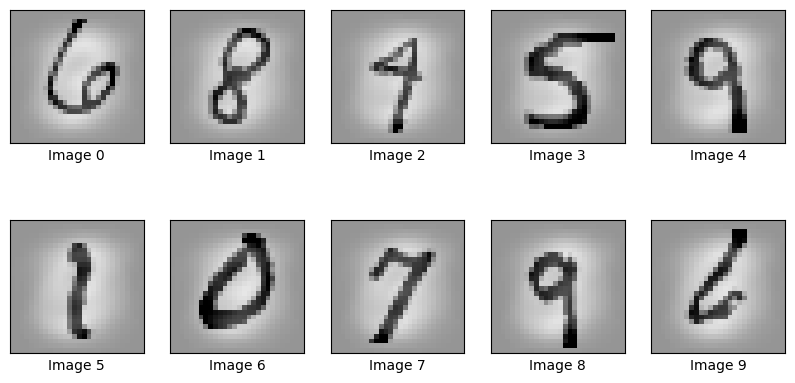

In [15]:
scale = np.max(abs(X_train))
plt.figure(figsize=(10, 5))
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(X_train[i,:].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin= -2, vmax=2)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Image '+ str(i))
plt.show()

In [16]:
clfCV = LogisticRegressionCV(cv = 5, multi_class = "multinomial", random_state = 111, solver = 'saga',penalty = 'l2',tol = 0.1, max_iter = 1000,n_jobs=-1)
clfCV.fit(X_train,y_train)
score = clfCV.score(X_test,y_test)
print(score)

/home/ramesh/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8815


In [17]:
classification_rep = classification_report(y_test, clfCV.predict(X_test))
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       197
           1       0.87      0.96      0.91       229
           2       0.89      0.79      0.84       202
           3       0.88      0.84      0.86       203
           4       0.86      0.88      0.87       187
           5       0.83      0.85      0.84       195
           6       0.94      0.93      0.93       198
           7       0.93      0.90      0.91       205
           8       0.86      0.82      0.84       196
           9       0.84      0.88      0.86       188

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



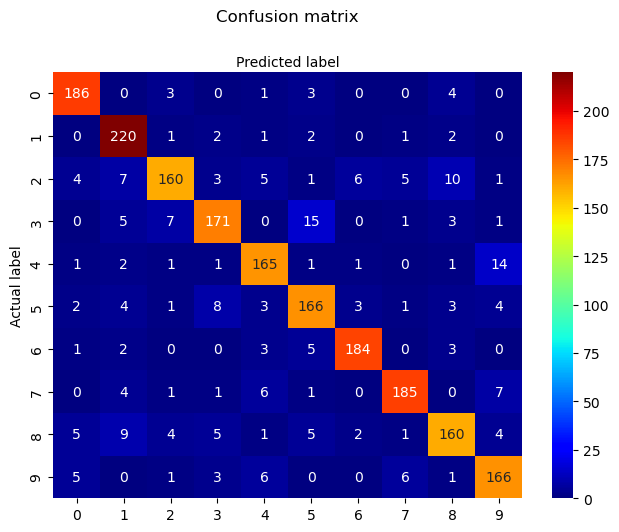

In [18]:
y_pred = clfCV.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test, y_pred)
#Never say '"Healthy", "Normal", just say "Undiagnosed"
class_names=[str(i) for i in range(10)]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

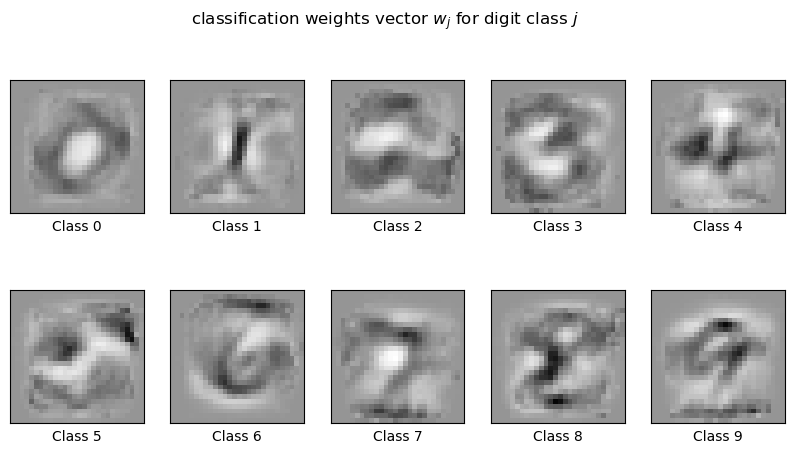

In [19]:
# plot weights vs the pixel position
coef_L2 = clfCV.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef_L2).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef_L2[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()



In [20]:
clfCV = LogisticRegressionCV(cv = 5, multi_class = "multinomial", random_state = 111, solver = 'saga',penalty = 'l1',tol = 0.1, max_iter = 1000,n_jobs=-1)
clfCV.fit(X_train,y_train)
score = clfCV.score(X_test,y_test)
print(score)

/home/ramesh/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8775


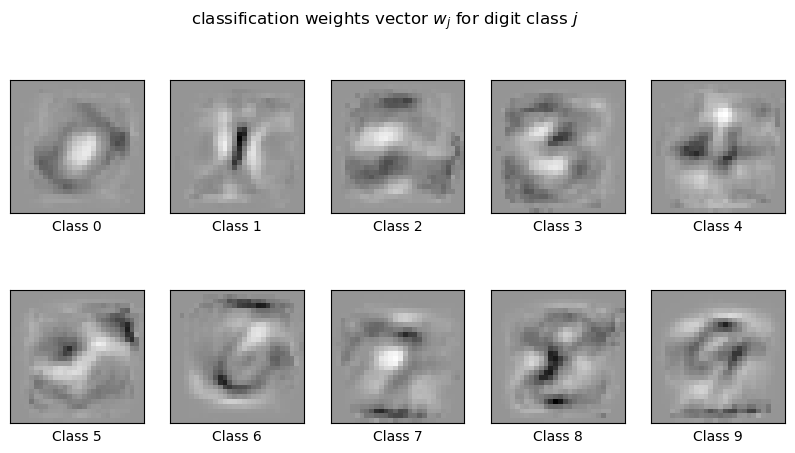

In [22]:
# plot weights vs the pixel position
coef_L1 = clfCV.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef_L1).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef_L1[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

Were any of the coefficients set to zero? 

In [23]:
np.sum(coef_L1[1] == 0)/np.size(coef_L1[1])

np.float64(0.1556122448979592)

And it was more than in the Ridge model

In [24]:

np.sum(coef_L2[1] == 0)/np.size(coef_L2[1])

np.float64(0.1556122448979592)